# Exercise

## Setup

In [ ]:
!nvidia-smi
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers transformers[sentencepiece] scipy ftfy accelerate openai

In [ ]:
from openai import OpenAI
import IPython.display as ipd
import os
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import urllib.request

## Exercise 1: Using ModelHub (Easy)

Now try for yourself and get your hands dirty.

In the guided programming session we already covered a translation task. Modify the example to translate from english to spanish (instead of german). Search the [ModelHub](https://huggingface.co/models) to find a model which allows translating from english to spanish.

In [ ]:
##translation from english to german
from transformers import pipeline
mdl_name = "Helsinki-NLP/opus-mt-en-de"
translator = pipeline("translation", model=mdl_name)

input_text = "Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models. Using pretrained models can reduce your compute costs, carbon footprint, and save you the time and resources required to train a model from scratch. "
translated_text = translator(input_text)
print(translated_text)

In [ ]:
##Modify the above code snippet to translate from English to Spanish (instead of German)

### YOUR CODE START

### YOUR CODE END

## Exercise 2: Dinner Inspiration with Chat Completions API and Diffusors library

In this exercise, you get inspiration for cooking dinner based on the ingredients at your disposal in the fridge.

This is your starting point, with a picture of the fridge contents specified in a URI.

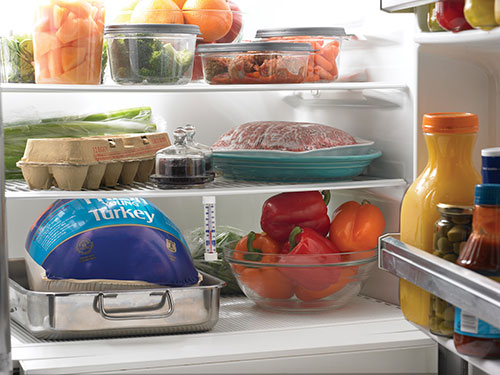

In [ ]:
uri = 'https://extension.umn.edu/sites/extension.umn.edu/files/refrigerator-chill-fsis.jpg'
with urllib.request.urlopen(uri) as url:
    img=Image.open(url)
    display(img)

### Using Chat Completions API to Identify Ingredients

Define a function that uses the `gpt-4-vision-preview` model for listing the ingredients visible in the picture at the specified URI.

In [ ]:
os.environ['OPENAI_API_KEY'] = 'COPY THE API_KEY HERE'
client = OpenAI()

In [ ]:
def listIngredients(uri):
  response =

  # Add your code here to list the ingredients visible in the picture at the specified URI.
  # See https://platform.openai.com/docs/guides/vision for an example how to use gpt-4-vision-preview

  return response.choices[0].message.content

In [ ]:
ingredients = listIngredients(uri)
print(ingredients)

### Using Chat Completions API to Create Recipe

In a next step prompt the Chat Completions API to create a recipe based on the ingredients. Use `gpt-3.5-turbo` as model.

In [ ]:
def createRecipe(ingredients):
  response =

  # Add your code here to create a recipe based on the ingredients.
  # (1) Use a system message to instruct the model how to behave and
  # (2) Pass the ingredients in a user message.

  return response.choices[0].message.content

In [ ]:
recipe = createRecipe(ingredients)
print(recipe)

### Using Chat Completions API to Generate Dish Name

Now use again the Chat Completions API along with the `gpt-3.5-turbo` model to generate a name for the dish.

In [ ]:
def generateDishName(recipe):
  response =

  # Add your code here to generate a name for the dish.
  # (1) Use a system message to instruct the model what to do and
  # (2) Pass the recipe in a user message.

  dishName = response.choices[0].message.content
  return dishName

In [ ]:
dishName = generateDishName(recipe)
print(dishName)

### Using Diffusors Library to Create Image

Now use the Diffusors library to create an image using the name of the dish as prompt.

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
#replace cuda with cpu if you don't get a GPU allocated

In [ ]:
def generate_image(prompt):
  ## YOUR CODE START

  ## YOUR CODE END
  return image

  0%|          | 0/50 [00:00<?, ?it/s]

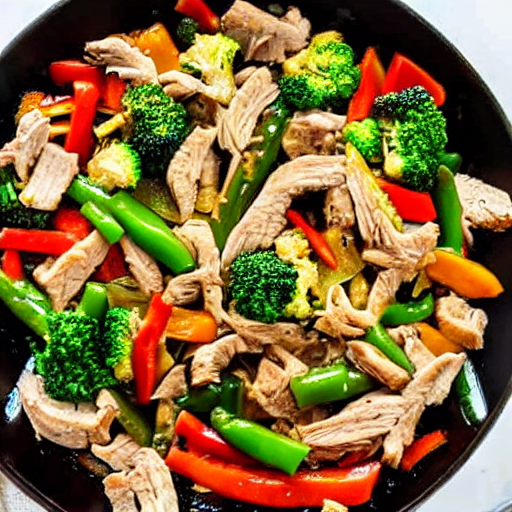

In [ ]:
image = generate_image(dishName)

image

## Exercise 3: Experimenting with Image Generation

This exercise requires you to run some experiments using  `StableDiffusionPipeline`.

1) Choose an image prompt of your choice.

2) Generate images by experimenting with
*   a) different models
*   b) varying the prompt
*   c) a different number of steps
*   d) different schedulers

3) As a bonus you can additionally include OpenAI's Image API in the comparison.

In [ ]:
#Example prompts
#prompt = "portrait photo of a old warrior chief"

In [ ]:
prompt = #add here the prompt of your choice

### Experiment 1: Testing Different Models

In [ ]:
device = "cuda"
models = ["CompVis/stable-diffusion-v1-4", "digiplay/Photon_v1", "dreamlike-art/dreamlike-diffusion-1.0"]
#models = ["CompVis/stable-diffusion-v1-4", "stabilityai/stable-diffusion-xl-base-1.0", "runwayml/stable-diffusion-v1-5"]

In [ ]:
#helper function to create a grid of images
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
from diffusers import DiffusionPipeline

steps = 50
images = []

for model in models:
  ## YOUR CODE (START)

  ## For each model in models generate one image and store the image in a variable called image

  ## YOUR CODE (END)
  images.append(image)

image_grid(images, 1, 3)

### Experiment 2: Varying the Prompt

In [ ]:
#Example prompts
#prompts = [
#    "portrait photo of the oldest warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
#    "portrait photo of a old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
#    "portrait photo of a warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
#    "portrait photo of a young warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
#]

In [ ]:
# add here a list of prompts
prompts = [
    "prompt 1 - add your own prompt",
    "prompt 2 - add your own prompt",
    "prompt 3 - add your own prompt",
    "prompt 4 - add your own prompt",
]

In [ ]:
from diffusers import DiffusionPipeline

steps = 25

## YOUR CODE (START)

## YOUR CODE (END)

image_grid(images, 2, 2)

### Experiment 3: Experimenting with a Different Number of Steps

Experiment with 10 to 100 steps.

In [ ]:
from diffusers import DiffusionPipeline

images = []

for steps in range(10,101,10):

  ## YOUR CODE (START)

  ## Generate one image per number of steps

  ##YOUR CODE (END)

  images.append(image)

image_grid(images, 2, 5)

### Experiment 4: Experimenting with Different Schedulers

In [ ]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler, EulerAncestralDiscreteScheduler, DPMSolverMultistepScheduler

model = "dreamlike-art/dreamlike-diffusion-1.0"
steps = 20
images = []

# EulerDiscrete Scheduler
## YOUR CODE (START)
## Generate one image using the EulerDiscrete Scheduler
## YOUR CODE (END )
images.append(image)

# EulerAncestralDiscreteScheduler
## YOUR CODE (START)
## Generate one image using the EulerAncestralDiscrete Scheduler
## YOUR CODE (END )
images.append(image)

# DPMSolverMultiStepScheduler
## YOUR CODE (START)
## Generate one image using the DPMSolverMultistepScheduler Scheduler
## YOUR CODE (END )
images.append(image)

image_grid(images, 1, 3)